# 빅데이터분석 특강 기말고사 예상문제 

## imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [3]:
tnp.experimental_enable_numpy_behavior()

In [4]:
%load_ext tensorboard

In [5]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

#### `(1)` 
`tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

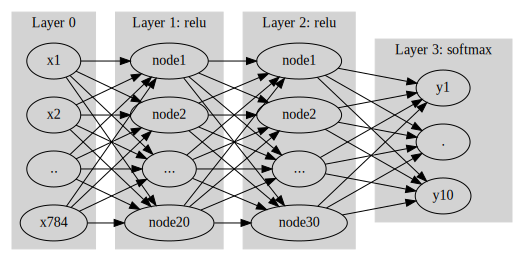

In [5]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [179]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [180]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [181]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net1.fit(X,y,epochs=10,batch_size=200)

Epoch 1/10
300/300 [==============================] - 3s 10ms/step - loss: 4.2346 - accuracy: 0.1239
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 2.0610 - accuracy: 0.2200
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 1.9304 - accuracy: 0.2559
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 1.6939 - accuracy: 0.3190
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 1.4987 - accuracy: 0.3839
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 1.3747 - accuracy: 0.4259
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 1.3239 - accuracy: 0.4353
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 1.2969 - accuracy: 0.4404
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 1.1533 - accuracy: 0.5128
Epoch 10/10
300/300 [==============================] - 3s 10ms/step - loss: 1.1005 - accura

#### `(2)` 
(1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. 

In [182]:
net1.evaluate(XX,yy)  #평가를 해보자

313/313 [==============================] - 4s 12ms/step - loss: 1.1445 - accuracy: 0.5210


[1.1445320844650269, 0.5210000276565552]

#### `(3)` 
train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? 

In [167]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics='accuracy')

In [168]:
cb1 = tf.keras.callbacks.TensorBoard()
net1.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 3s 13ms/step - loss: 4.7876 - accuracy: 0.1153 - val_loss: 2.2636 - val_accuracy: 0.1415
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 2.1072 - accuracy: 0.2081 - val_loss: 2.0320 - val_accuracy: 0.2234
Epoch 3/50
240/240 [==============================] - 3s 12ms/step - loss: 1.9789 - accuracy: 0.2408 - val_loss: 1.9763 - val_accuracy: 0.2341
Epoch 4/50
240/240 [==============================] - 3s 12ms/step - loss: 1.8792 - accuracy: 0.2676 - val_loss: 1.7629 - val_accuracy: 0.3080
Epoch 5/50
240/240 [==============================] - 3s 13ms/step - loss: 1.6769 - accuracy: 0.3171 - val_loss: 1.6306 - val_accuracy: 0.3285
Epoch 6/50
240/240 [==============================] - 3s 12ms/step - loss: 1.4436 - accuracy: 0.4151 - val_loss: 1.3516 - val_accuracy: 0.4481
Epoch 7/50
240/240 [==============================] - 3s 13ms/step - loss: 1.2371 - accuracy: 0.5032 - val_loss: 1.1990 - val_accuracy: 0.5272

In [177]:
%tensorboard --logdir logs --host 0.0.0.0 

In [183]:
#!kill 398054

#### `(4)`
(3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. 

In [172]:
net1.evaluate(XX,yy)  #평가를 해보자

313/313 [==============================] - 4s 12ms/step - loss: 0.7137 - accuracy: 0.7519


[0.7136780619621277, 0.7519000172615051]

#### `(5)`
조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [184]:
!rm -rf logs

In [185]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics='accuracy')

In [186]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net1.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/50
240/240 [==============================] - 3s 13ms/step - loss: 4.7876 - accuracy: 0.1153 - val_loss: 2.2636 - val_accuracy: 0.1415
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 2.1072 - accuracy: 0.2081 - val_loss: 2.0320 - val_accuracy: 0.2234
Epoch 3/50
240/240 [==============================] - 3s 13ms/step - loss: 1.9813 - accuracy: 0.2408 - val_loss: 1.9512 - val_accuracy: 0.2482
Epoch 4/50
240/240 [==============================] - 3s 13ms/step - loss: 1.8790 - accuracy: 0.2669 - val_loss: 1.7602 - val_accuracy: 0.3180
Epoch 5/50
240/240 [==============================] - 3s 13ms/step - loss: 1.6791 - accuracy: 0.3177 - val_loss: 1.6264 - val_accuracy: 0.3417
Epoch 6/50
240/240 [==============================] - 3s 13ms/step - loss: 1.4835 - accuracy: 0.3961 - val_loss: 1.4040 - val_accuracy: 0.4299
Epoch 7/50
240/240 [==============================] - 3s 12ms/step - loss: 1.3185 - accuracy: 0.4638 - val_loss: 1.2663 - val_accuracy: 0.4893

In [187]:
%tensorboard --logdir logs --host 0.0.0.0 

In [92]:
#!kill 381901

## 2. Fashion_mnist, CNN (30점)

#### `(1)`
`tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

In [144]:
tf.random.set_seed(1234)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Conv2D(6,(5,5),activation='relu'))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu'))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(120,activation='relu'))
net2.add(tf.keras.layers.Dropout(0.2))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [145]:
c1,m1,c2,m2,flttn,dns1,dropout,dns2 = net2.layers

In [146]:
print(c1(X).shape)
print(m1(c1(X)).shape)
print(c2(m1(c1(X))).shape)
print(m2(c2(m1(c1(X)))).shape)
print(flttn(m2(c2(m1(c1(X))))).shape)
print(dns1(flttn(m2(c2(m1(c1(X)))))).shape)
print(dropout(dns1(flttn(m2(c2(m1(c1(X))))))).shape)
print(dns2(dropout(dns1(flttn(m2(c2(m1(c1(X)))))))).shape)

(60000, 24, 24, 6)
(60000, 12, 12, 6)
(60000, 8, 8, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 120)
(60000, 10)


In [147]:
net2.fit(X,y,epochs=10,batch_size=200) 

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 1.8950 - accuracy: 0.6255
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6264 - accuracy: 0.7666
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.5307 - accuracy: 0.8032
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4863 - accuracy: 0.8184
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4551 - accuracy: 0.8294
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4279 - accuracy: 0.8391
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4051 - accuracy: 0.8474
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3910 - accuracy: 0.8533
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3717 - accuracy: 0.8594
Epoch 10/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3605 - accuracy: 0.8647

In [148]:
net2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (200, 24, 24, 6)          156       
                                                                 
 max_pooling2d_56 (MaxPoolin  (200, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (200, 8, 8, 16)           2416      
                                                                 
 max_pooling2d_57 (MaxPoolin  (200, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_38 (Flatten)        (200, 256)                0         
                                                                 
 dense_76 (Dense)            (200, 120)              

#### `(2)`
n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

In [141]:
from tensorboard.plugins.hparams import api as hp

In [158]:
tf.random.set_seed(1234)
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hayoung_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            net2 = tf.keras.Sequential()
            net2.add(tf.keras.layers.Conv2D(u,(5,5),activation='relu'))
            net2.add(tf.keras.layers.MaxPool2D()) 
            net2.add(tf.keras.layers.Conv2D(d,(5,5),activation='relu'))
            net2.add(tf.keras.layers.MaxPool2D()) 
            net2.add(tf.keras.layers.Flatten())
            net2.add(tf.keras.layers.Dense(120,activation='relu'))
            net2.add(tf.keras.layers.Dropout(0.2))
            net2.add(tf.keras.layers.Dense(10,activation='softmax'))
            net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net2.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb3)
            net2.evaluate(XX,yy)
            _rslt=net2.evaluate(XX,yy)
            tf.summary.scalar('test set loss', _rslt[0], step=1) 

Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 2.2399 - accuracy: 0.6080 - val_loss: 0.6751 - val_accuracy: 0.7465
Epoch 2/3
240/240 [==============================] - 2s 7ms/step - loss: 0.6752 - accuracy: 0.7527 - val_loss: 0.5574 - val_accuracy: 0.7929
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.5350 - accuracy: 0.8016
Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 1.9985 - accuracy: 0.6402 - val_loss: 0.5187 - val_accuracy: 0.8274
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.5635 - accuracy: 0.8059 - val_loss: 0.4245 - val_accuracy: 0.8579
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.3908 - accuracy: 0.8665
Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 1.5759 - accuracy: 0.5369 - val_loss: 0.7116 - val_accuracy: 0.7497
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.6449 - accuracy: 0.7

In [161]:
%tensorboard --logdir logs --host 0.0.0.0

In [160]:
!kill 397183

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
X = tf.constant(x_train.reshape(-1,32,32,3),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,32,32,3),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

2022-06-13 16:13:34.505162: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB (rounded to 1228800000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-06-13 16:13:34.505206: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-06-13 16:13:34.505217: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505223: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505229: I tensorflow/core/common_runtim

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

 in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505255: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (32768): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505260: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (65536): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505266: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (131072): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505271: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (262144): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-06-13 16:13:34.505276: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (524288): 	Tota

In [ ]:
print(X.shape)
print(y.shape)
print(XX.shape)
print(yy.shape)

In [ ]:
tf.random.set_seed(1234)
net3 = tf.keras.Sequential()
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) 
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) 
net3.add(tf.keras.layers.Flatten())
net3.add(tf.keras.layers.Dense(128,activation='relu'))
net3.add(tf.keras.layers.Dense(10,activation='softmax'))
net3.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net3.fit(X,y,epochs=10,batch_size=200)

In [ ]:
net3.evaluate(XX,yy)

In [ ]:
summary(net3)

## 4. 다음을 읽고 물음에 답하라. (10점)

#### (1)
(1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

A : (1,127,127,5)

#### (2)
(1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

In [121]:
24*24*16

9216

A : (1,9216)

#### (3)
관측치의 수가 10인 자료에서 batch_size=3으로 설정하면 한 에폭당 몇번의 이터레이션이 수행되는가?

A : 3

#### (4)
적당한 선형변환을 적용하여 (28,28)의 크기를 가진 흑백이미지를 (27,27)의 크기를 가지는 흑백이미지로 바꾸려 한다. (2,2) 크기의 커널을 가진 Conv2D layer를 이용한다면 몇개의 가중치가 필요한가? (바이어스는 무시한다)

A : 4

#### (5)
적당한 선형변환을 적용하여 (28,28)의 크기를 가진 흑백이미지를 (27,27)의 크기를 가지는 흑백이미지로 바꾸려 한다. Dense layer를 이용한다면 몇개의 가중치가 필요한가? (바이어스는 무시한다)

A : 1